<img src="../part_of_cover_bakker_post.png" width="800px">

The Python code provided below is from <br>
**Analytical Groundwater Modeling: Theory and Applications Using Python** <br>
by *Mark Bakker and Vincent Post* <br>
ISBN 9781138029392

The book is published by CRC press and is available [here](https://www.routledge.com/Analytical-Groundwater-Modeling-Theory-and-Applications-using-Python/Bakker-Post/p/book/9781138029392).

This Notebook is provided under the [MIT license](https://github.com/pythongroundwaterbook/analytic_gw_book/blob/main/LICENSE). 

<p>© 2022 Mark Bakker and Vincent Post</p>

# Steady one-dimensional semi-confined flow

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 3) # set default figure size
plt.rcParams["contour.negative_linestyle"] = 'solid' # set default line style
plt.rcParams["figure.autolayout"] = True # same as tight_layout after every plot

## Flow from a canal to a drained area

<img src="figs/fig2.1.png" width=400>

In [2]:
# parameters
hstar = 0 # head above leaky layer, m
h0 = 1 # specified head at the left boundary, m
k = 10 # hydraulic conductivity, m/d
H = 40 # aquifer thickness, m
c = 100 # resistance of leaky layer, d
T = k * H # transmissivity, m^2/d
lab = np.sqrt(c * T) # leakage factor, m
print(f'the leakage factor is: {lab:.0f} m')

the leakage factor is: 200 m


In [3]:
# solution
def head(x):
    return (h0 - hstar) * np.exp(-x / lab) + hstar

def disvec(x):
    return k * H * (h0 - hstar) / lab * np.exp(-x / lab)

x = np.linspace(0, 5 * lab, 100)
h = head(x)
Qx = disvec(x)

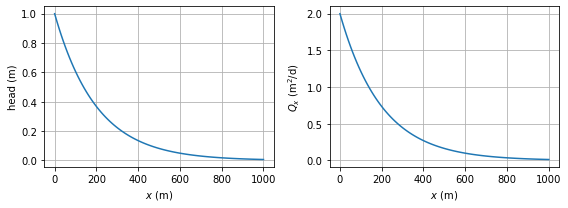

In [4]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
plt.plot(x, Qx)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)');

In [5]:
# Verify boundary conditions
print(f'head at x=0: {head(0):.0f} m')
print(f'head at x=infinity: {head(np.inf):.0f} m')

head at x=0: 1 m
head at x=infinity: 0 m


In [6]:
# Verify differential equation
x = 200 # example point where deq is checked
delx = 0.001
left_side = (head(x - delx) - 2 * head(x) + head(x + delx)) / delx ** 2
right_side = (head(x) - hstar) / lab ** 2
print(f'left_side of deq : {left_side}')
print(f'right_side of deq: {right_side}')

left_side of deq : 9.196976513692334e-06
right_side of deq: 9.196986029286058e-06


In [7]:
# Verify Qx
Qx = disvec(x)
Qxnum = -T * (head(x + delx) - head(x - delx)) / (2 * delx)
print(f'Qx exact               : {Qx} m^2/d')
print(f'Qx numerical derivative: {Qxnum} m^2/d')

Qx exact               : 0.7357588823428847 m^2/d
Qx numerical derivative: 0.7357588823531103 m^2/d


## Flow between a lake and a drained area

<img src="figs/fig2.2.png" width=400>

In [8]:
# parameters
h0star = 1 # head above left side leaky layer, m
h1star = -1 # head above right side leaky layer, m
k = 10 # hydraulic conductivity, m/d
H = 10 # aquifer thickness, m
c0 = 100 # resistance of left side leaky layer, d
c1 = 400 # resistance of right side leaky layer, d
T = k * H # transmissivity, m2/d
lab0 = np.sqrt(c0 * T) # leakage factor left side, m
lab1 = np.sqrt(c1 * T) # leakage factor right side, m
gamma = (h0star - h1star) / (lab0 + lab1) # dimensionless head difference, -

In [9]:
# solution
x = np.hstack((np.linspace(-5 * lab0, 0, 51), np.linspace(0, 5 * lab1, 51)))
h = np.zeros_like(x)
h[x < 0]  = h0star - lab0 * gamma * np.exp(x[x < 0] / lab0)
h[x >= 0] = h1star + lab1 * gamma * np.exp(-x[x >= 0] / lab1)
Qx = np.zeros_like(x)
Qx[x<0] = T * gamma * np.exp(x[x<0] / lab0)
Qx[x>=0] = T * gamma * np.exp(-x[x>=0] / lab1)
Q0 = T * gamma

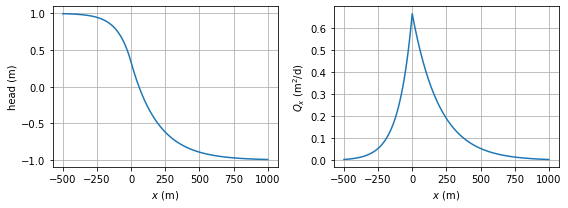

In [10]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
plt.plot(x, Qx)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)');

In [11]:
# solution
psi = np.zeros((2, len(x)))
psi[1] = -Qx
xg = x
zg = [0, H]

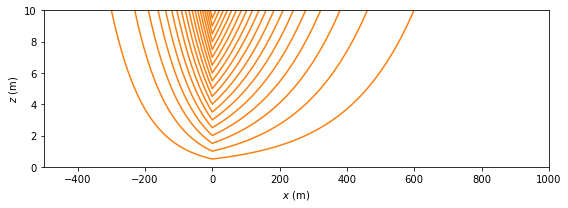

In [12]:
# basic streamline plot
plt.contour(xg, zg, psi, np.linspace(-Q0, 0, 21), colors='C1', linestyles='-')
plt.xlabel('$x$ (m)')
plt.ylabel('$z$ (m)');

## Flow to a river of finite width

<img src="figs/fig2.3.png" width=400>

In [13]:
# parameters
k = 5 # hydraulic conductivity, m/d
H = 10 # aquifer thickness, m
hstar = 10 # head in river 
L = 100 # half width of river
c = 200 # resistance of leaky river bed, d
UL = 0.1 # Qx in left aquifer
UR = -0.05 # Qx in right aquifer
T = k * H # transmissivity, m^2/d
lab = np.sqrt(T * c) # leakage factor of aquifer below river
print(f'leakage factor: {lab:.0f} m')

leakage factor: 100 m


In [14]:
x = np.linspace(-300, 300, 100)
A = -lab * (UL + UR) / (2 * T) / np.cosh(L / lab)
B =  lab * (UL - UR) / (2 * T) / np.sinh(L / lab)
h0 = A * np.sinh(-L / lab) + B * np.cosh(-L / lab) + hstar
h1 = A * np.sinh(L / lab) + B * np.cosh(L / lab) + hstar
h = np.zeros(len(x))
h[x <= -L] = -UL / T * (x[x <= -L] + L) + h0
h[x >= L]  = -UR / T * (x[x >= L] - L) + h1
h[np.abs(x) < L] = A * np.sinh(x[np.abs(x) < L] / lab) + \
                   B * np.cosh(x[np.abs(x) < L] / lab) + hstar
Qx = np.zeros(len(x))
Qx[x <= 0] = UL
Qx[x >= L] = UR
Qx[np.abs(x) < L] = -A * T / lab * np.cosh(x[np.abs(x) < L] / lab) - \
                     B * T / lab * np.sinh(x[np.abs(x) < L] / lab)

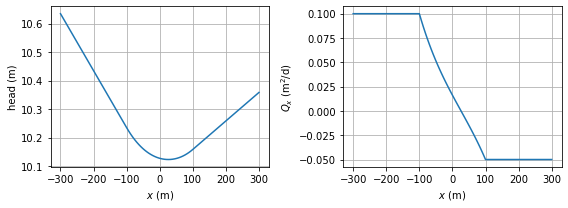

In [15]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
plt.plot(x, Qx)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)');

In [16]:
# solution
psi = np.zeros((2, len(x)))
psi[1] = -Qx
xg = x
zg = [0, H]

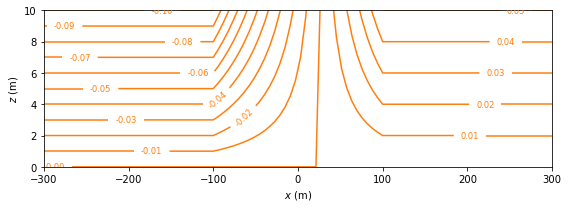

In [17]:
# basic streamline plot
cs = plt.contour(xg, zg, psi, np.arange(-0.1, 0.05, 0.01), colors='C1', linestyles='-')
plt.clabel(cs, fmt='%1.2f', fontsize='smaller')
plt.xlabel('$x$ (m)')
plt.ylabel('$z$ (m)');

## Flow to a river in a two-aquifer system

<img src="figs/fig2.4.png" width=400>

In [18]:
# parameters
k0 = 10 # hydraulic conductivity aquifer 0, m/d
k1 = 20 # hydraulic conductivity aquifer 1, m/d
H0 = 10 # thickness aquifer 0, m
H1 = 10 # thickness aquifer 1, m
Hstar = 2 # thickness leaky layer
kstar = 0.01 # hydraulic conductivity leaky layer, m/d
hr = 5 # head in river, m
GL = -0.002 # head gradient far away to the left, -
GR = 0.0005 # head gradient far away to the right, -

In [19]:
# solution
T0 = k0 * H0
T1 = k1 * H1
c = Hstar / kstar
T = T0 + T1
UL0 = -T0 * GL
UL1 = -T1 * GL
UR0 = -T0 * GR
UR1 = -T1 * GR
σ = UL0 + UL1 - (UR0 + UR1)
λ = np.sqrt(c * T0 * T1 / T)
print(f'leakage factor: {λ:.2f} m')
#
x = np.linspace(-4 * λ, 4 * λ, 401)
def hmaq(x):
    if x <= 0:
        h0 = -UL0 / T0 * x - T1 / T0 * λ / T * σ / 2 * (np.exp(x / λ) - 1) + hr
        h1 = -UL1 / T1 * x + λ / T * σ / 2 * (np.exp(x / λ) + T1 / T0) + hr
    else:
        h0 = -UR0 / T0 * x - T1 / T0 * λ / T * σ / 2 * (np.exp(-x / λ) - 1) + hr
        h1 = -UR1 / T1 * x + λ / T * σ / 2 * (np.exp(-x / λ) + T1 / T0) + hr
    return h0, h1

hmaqvec = np.vectorize(hmaq) # vectorized version of hmaq function
h0, h1 = hmaqvec(x)

def disxmaq(x):
    if x <= 0:
        Qx0 = UL0 + T1 / T * σ / 2 * np.exp(x / λ)
        Qx1 = UL1 - T1 / T * σ / 2 * np.exp(x / λ)
    else:
        Qx0 = UR0 - T1 / T * σ / 2 * np.exp(-x / λ)
        Qx1 = UR1 + T1 / T * σ / 2 * np.exp(-x / λ)
    return Qx0, Qx1

disxmaqvec = np.vectorize(disxmaq) # vectorized version of disxmaq function
Qx0, Qx1 = disxmaqvec(x)

leakage factor: 115.47 m


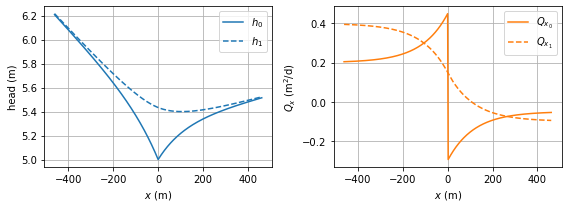

In [20]:
# basic plot
plt.subplot(121)
plt.plot(x, h0, 'C0', label='$h_0$')
plt.plot(x, h1, 'C0--', label='$h_1$')
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.legend()
plt.subplot(122)
plt.plot(x, Qx0, 'C1', label='$Q_{x_0}$')
plt.plot(x, Qx1, 'C1--', label='$Q_{x_1}$')
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)')
plt.legend();

In [21]:
# solution
z = [0, H1, H1 + Hstar, H1 + Hstar + H0]
psi = np.zeros((len(z), len(x)))
psi[1] = Qx1
psi[2] = Qx1
psi[3] = Qx1 + Qx0

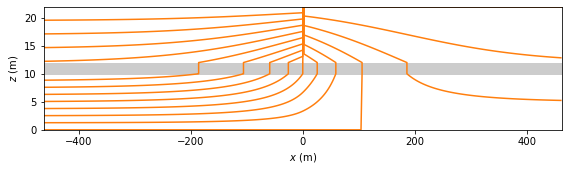

In [22]:
# basic streamline plot
plt.subplot(111, aspect=10)
plt.contour(x, z, psi, np.arange(-1, 1, 0.05), colors='C1')
plt.axhspan(H1, H1 + Hstar, color=[.8, .8, .8])
plt.xlabel('$x$ (m)')
plt.ylabel('$z$ (m)');

## Areal recharge between two rivers in a two-aquifer system

<img src="figs/fig2.5.png" width=400>

In [23]:
# parameters
hL = 0 # head in river, m
N = 0.001 # recharge, m/d
L = 500 # half distance between two rivers, m
k0 = 10 # hydraulic conductivity aquifer 0, m/d
H0 = 10 # thickness aquifer 0, m
k1 = 20 # hydraulic conductivity aquifer 1, m/d
H1 = 10 # thickness aquifer 1, m
kv = 0.005 # hydraulic conductivity leaky layer, m/d
Hv = 3 # thickness leaky layer, m
T0 = k0 * H0 # transmissivity aquifer 0, m^2/d
T1 = k1 * H1 # transmissivity aquifer 1, m^2/d
T = T0 + T1
c = Hv / kv # resistance leaky layer, d
lab = np.sqrt(c * T0 * T1 / (T0 + T1)) # leakage factor
print(f'leakage factor: {lab:.0f} m')

leakage factor: 200 m


In [24]:
# solution head
x = np.linspace(-L, L, 401)
h0 = -N / (2 * T) * (x ** 2 - L ** 2) - N * L * lab * T1 / (T * T0) * (
     np.cosh(x / lab) - np.cosh(L / lab)) / np.sinh(L / lab) + hL
h1 = -N / (2 * T) * (x ** 2 - L ** 2) + N * L * lab  / (T * T0) * (
     T0 * np.cosh(x / lab) + T1 * np.cosh(L / lab)) / np.sinh(L / lab) -\
     N * lab ** 2 / T0 + hL
h = -N / (2 * T0) * (x ** 2 - L ** 2) + hL # single layer solution, Section 1.2
print('relative diff in head at center between single layer and two-layer sol:',
      f'{(h[200] - h0[200]) / h0[200]:.2f}')
# solution Qx
xg = np.linspace(-L, L, 400)
Qx0 = T0 * N * xg / T + N * L * T1 * np.sinh(xg / lab) / (T * np.sinh(L / lab))
Qx1 = T1 * N * xg / T - N * L * T1 * np.sinh(xg / lab) / (T * np.sinh(L / lab))
Qx = N * xg
# solution stream function
zg = [-H0 - Hv - H1, -H0 - Hv, -H0, 0]
psi = np.zeros((4, len(xg)))
psi[1] = Qx1
psi[2] = Qx1
psi[3] = Qx1 + Qx0

relative diff in head at center between single layer and two-layer sol: 0.27


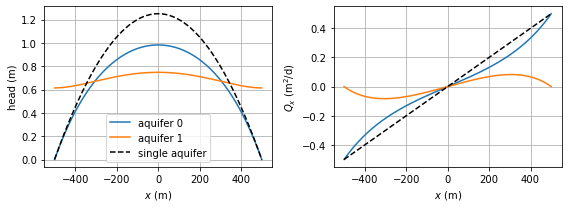

In [25]:
# basic plot
plt.subplot(121)
plt.plot(x, h0, label='aquifer 0')
plt.plot(x, h1, label='aquifer 1')
plt.plot(x, h, 'k--', label='single aquifer')
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.legend()
plt.subplot(122)
plt.plot(xg, Qx0, label='aquifer 0')
plt.plot(xg, Qx1, label='aquifer 1')
plt.plot(xg, Qx, 'k--', label='single aquifer')
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)');

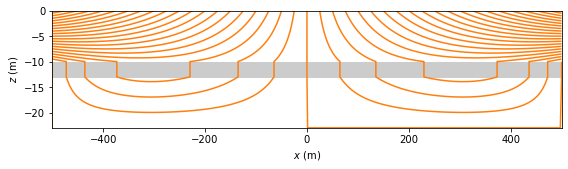

In [26]:
# basic streamline plot
plt.subplot(111, aspect=10)
plt.contour(xg, zg, psi, 40, colors='C1')
plt.axhspan(-H1, -H1 - Hv, color=[.8, .8, .8])
plt.xlabel('$x$ (m)')
plt.ylabel('$z$ (m)');

In [27]:
lablist = np.linspace(100, 1000, 100)
hcenter = np.zeros(len(lablist))
for i, lab in enumerate(lablist):
    hcenter[i] = N / (2 * T) * L ** 2 - N * L * lab * T1 / (T * T0) * (
                 1 - np.cosh(L / lab)) / np.sinh(L / lab) + hL

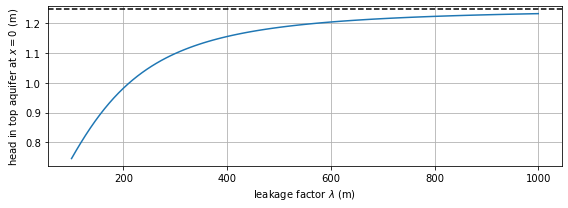

In [28]:
# basic plot
plt.plot(lablist, hcenter)
plt.axhline(N * L ** 2 / (2 * T0), color='k', ls='--')
plt.grid()
plt.xlabel('leakage factor $\lambda$ (m)')
plt.ylabel('head in top aquifer at $x=0$ (m)');